We begin by importing our data and taking a look at the column names

In [202]:
import pandas as pd
import numpy as np
cars = pd.read_csv('cars_cleaned.csv')
cars.columns

Index(['condition', 'drive', 'fuel', 'location', 'odometer', 'paint color',
       'price', 'sale type', 'title status', 'transmission', 'type',
       'cylinders', 'size', 'latitude', 'longitude', 'location_simple', 'year',
       'age', 'make_', 'model', 'pos_words', 'neg_words', 'low_text', 'model0',
       'model1', 'model2'],
      dtype='object')

In [147]:
cars.head()

,condition,drive,fuel,location,odometer,paint color,price,sale type,title status,transmission,...,year,age,make_,model,pos_words,neg_words,low_text,model0,model1,model2
0,good,4wd,gas,vancouver,281000,white,5500,owner,rebuilt,automatic,...,2007,14,bmw,x3,False,False,False,x3,None,None
1,unknown,NaN,gas,vancouver,140000,unknown,600,owner,clean,automatic,...,1984,37,honda,accord,False,False,False,accord,None,None
2,excellent,rwd,diesel,vancouver,110000,white,67000,owner,clean,automatic,...,2008,13,gmc,c7500,False,False,False,c7500,None,None
3,unknown,NaN,gas,vancouver,243000,unknown,4000,owner,clean,automatic,...,2003,18,acura,rsx,True,False,False,rsx,None,None
4,salvage,NaN,gas,vancouver,225000,black,1500,owner,salvage,automatic,...,2005,16,acura,rsx,False,False,False,rsx,None,None


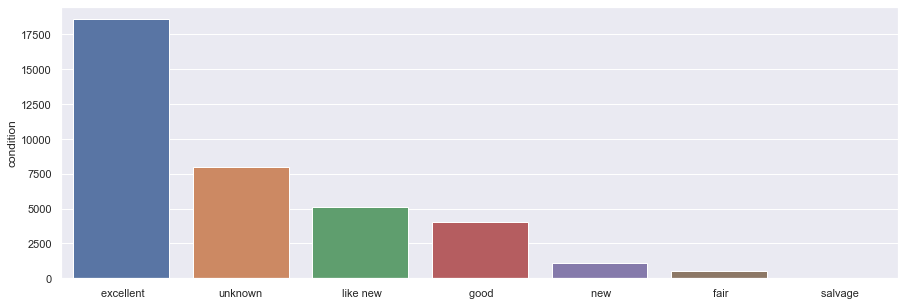

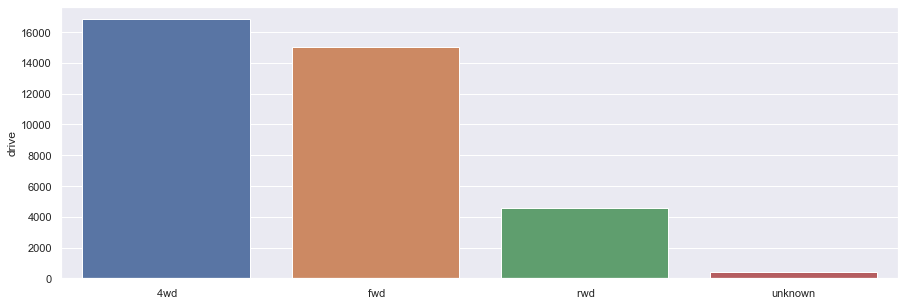

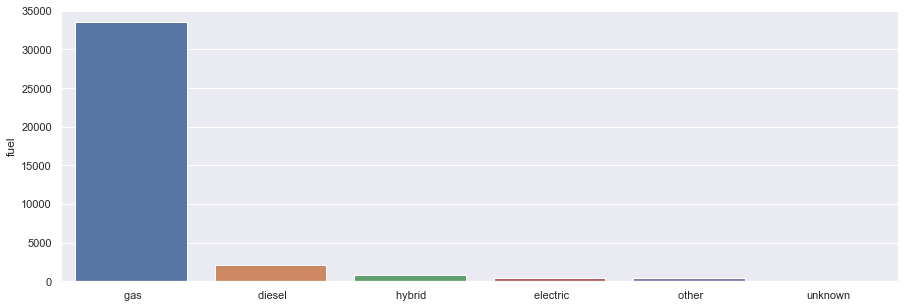

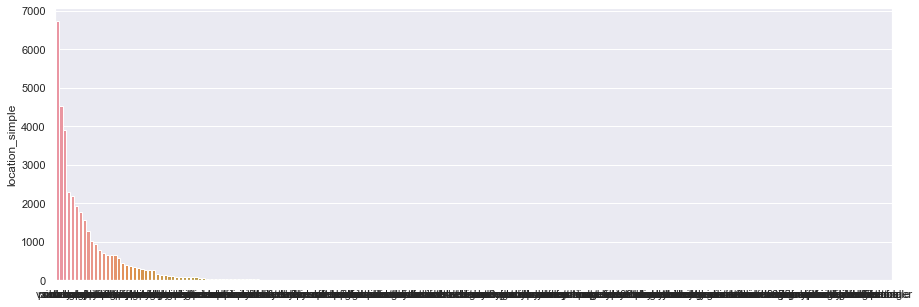

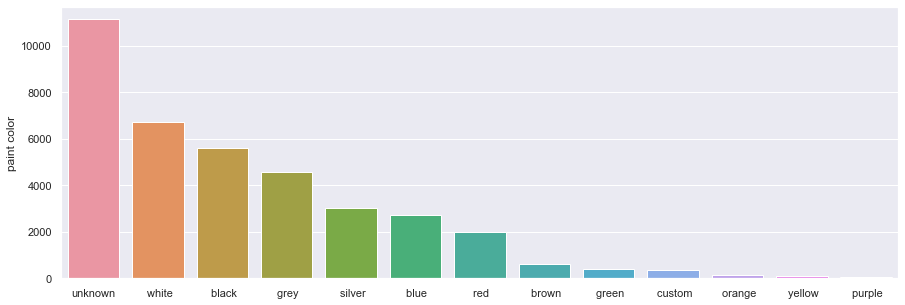

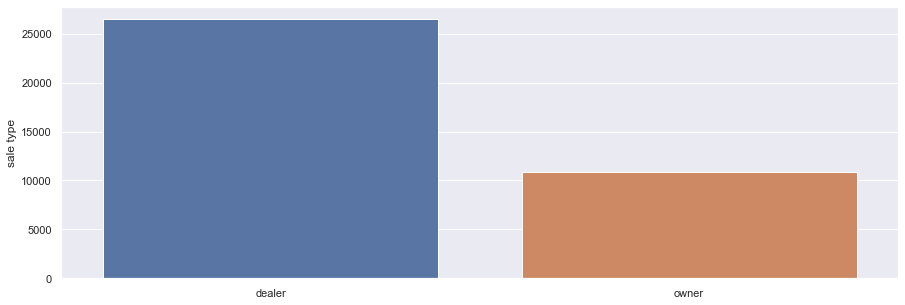

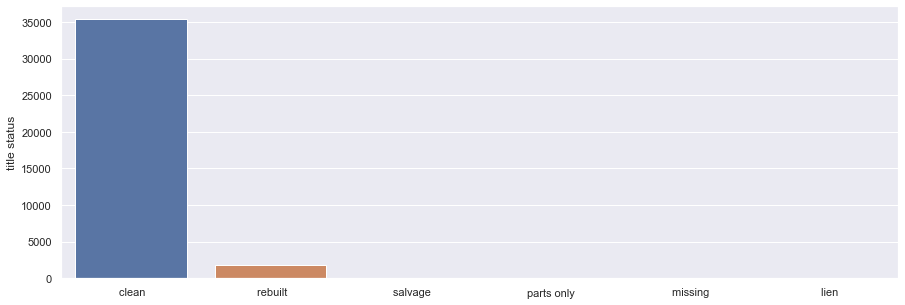

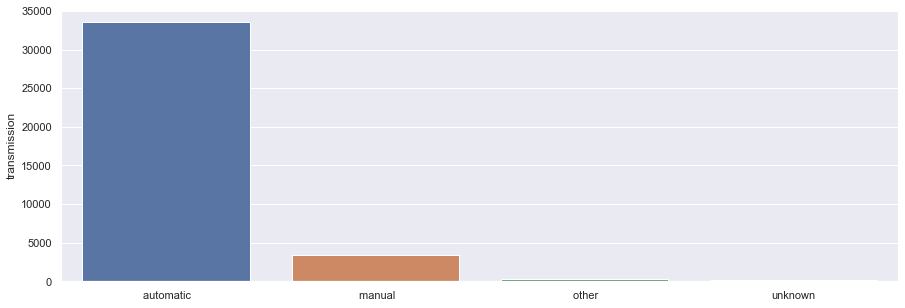

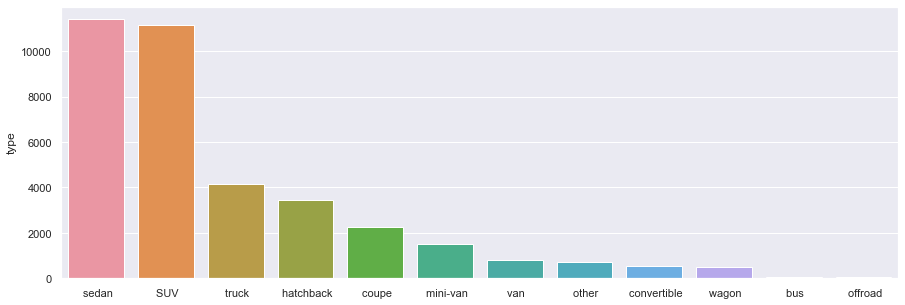

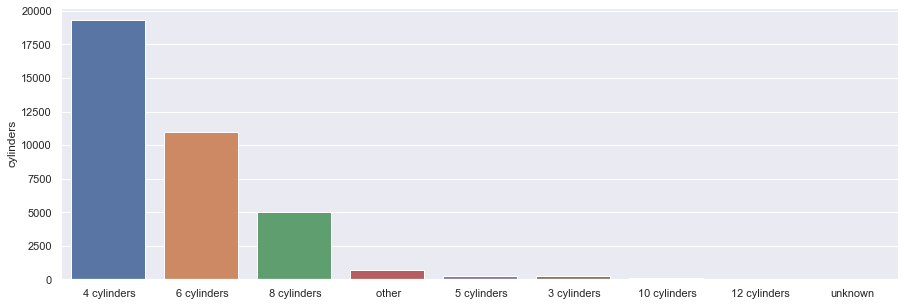

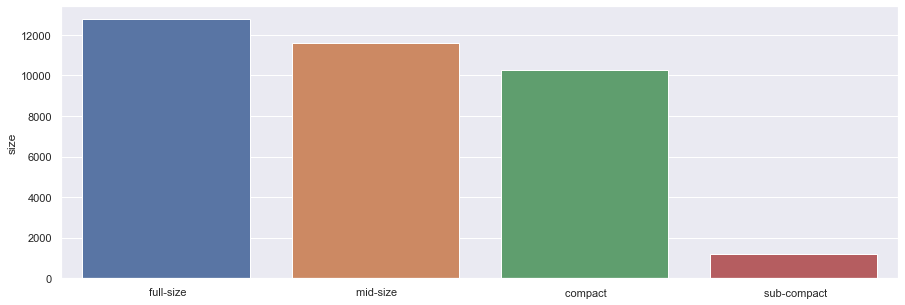

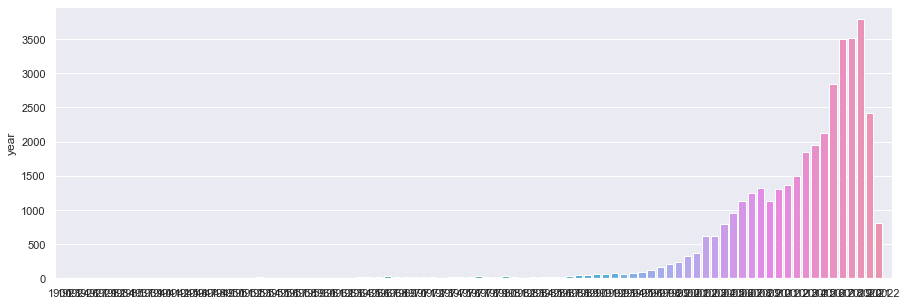

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})

for col in ['condition', 'drive', 'fuel', 'location_simple', 'paint color', 'sale type', 'title status', 'transmission', 'type', 
            'cylinders', 'size', 'year']:
    dat = cars[col].value_counts()
    sns.barplot(x = dat.index, y = dat)
    plt.show()

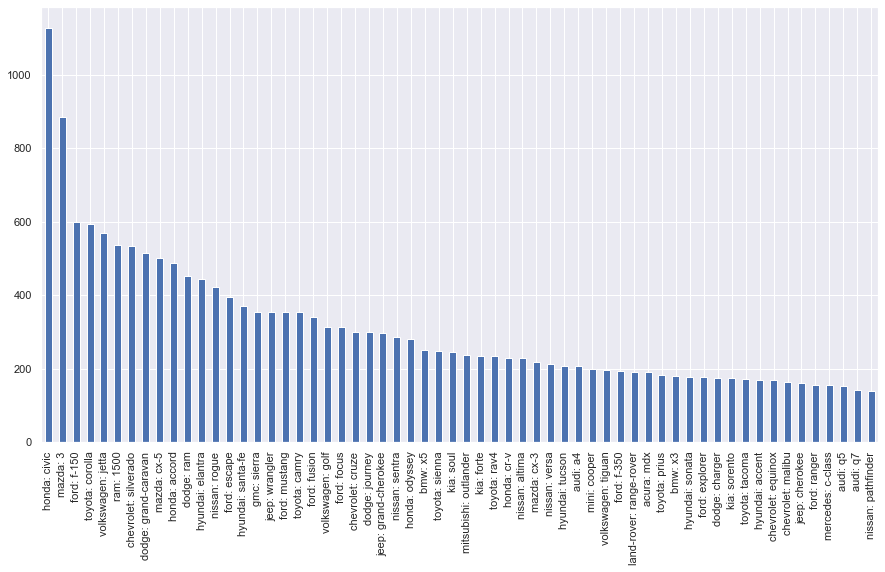

In [150]:
#column with the make and model in one (for plotting)
cars['make_model0'] = cars['make_'] + ': ' + cars['model0']
#plot 60 most popular cars
fig = cars.make_model0.value_counts()[:60].plot.bar(figsize=(15,8))
plt.show()

<AxesSubplot:xlabel='make_model0'>

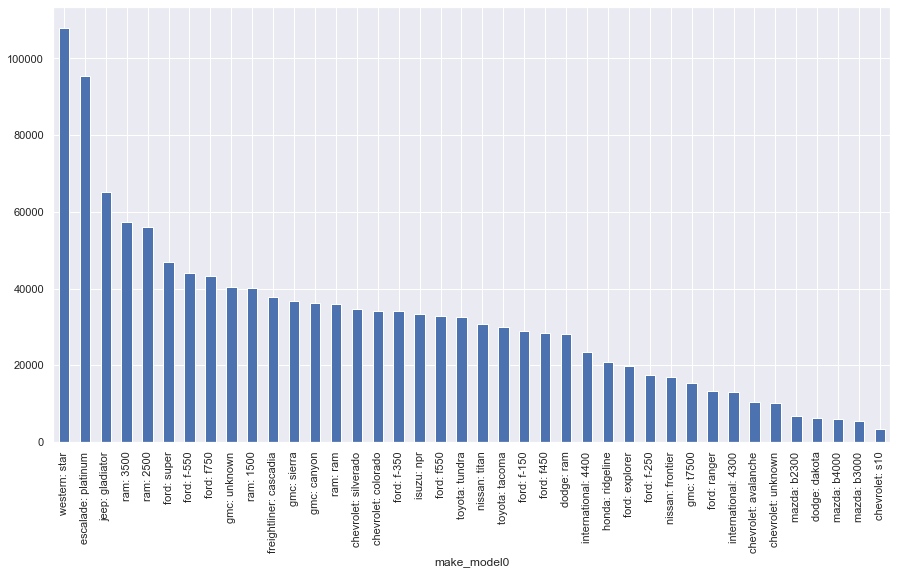

In [163]:
cars = cars.drop(cars[cars.price>500000].index, axis=0) #drop the few cars with very high price
com_cars = cars.make_model0.value_counts()[50:100].index
trucks = cars[cars['type']==' truck'].make_model0.value_counts()[0:40].index

#plot the average prices of the 60 most popular cars
com_price = cars[cars.make_model0.isin(trucks)].groupby(['make_model0']).price.mean().sort_values(ascending=False)
com_price.plot.bar(figsize=(15,8))

<AxesSubplot:>

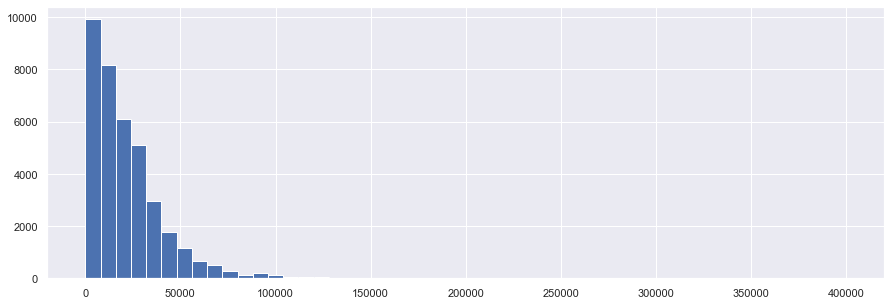

In [152]:
cars.price.hist(bins=50)

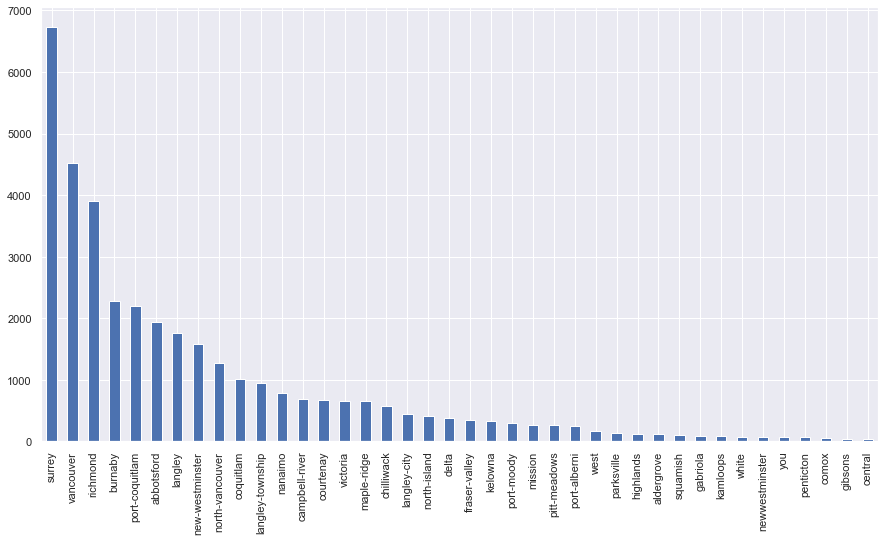

In [153]:
fig = cars.location_simple.value_counts()[0:40].plot.bar(figsize=(15,8))
plt.show()

In [165]:
cars[(cars['make_']=='mazda') & (cars['type']==' truck')].model0.value_counts()[0:50]

b4000       10
b3000        8
b2300        7
unknown      2
b2200        1
b2600i       1
b-series     1
Name: model0, dtype: int64

<AxesSubplot:ylabel='Frequency'>

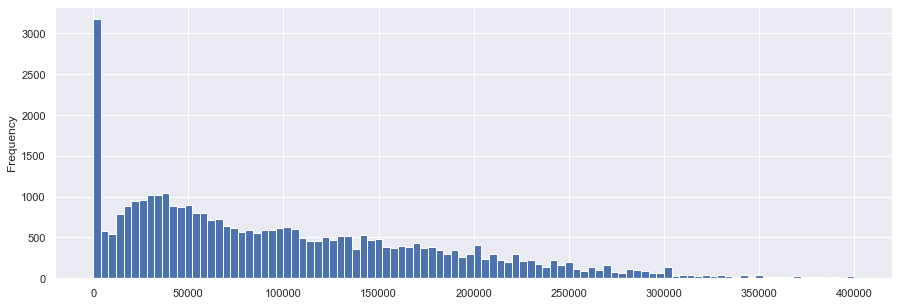

In [177]:
cars.odometer.plot.hist(bins=100, range=[0, 400000])

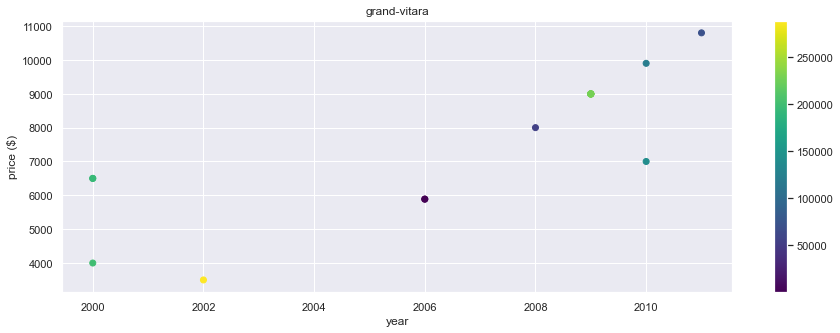

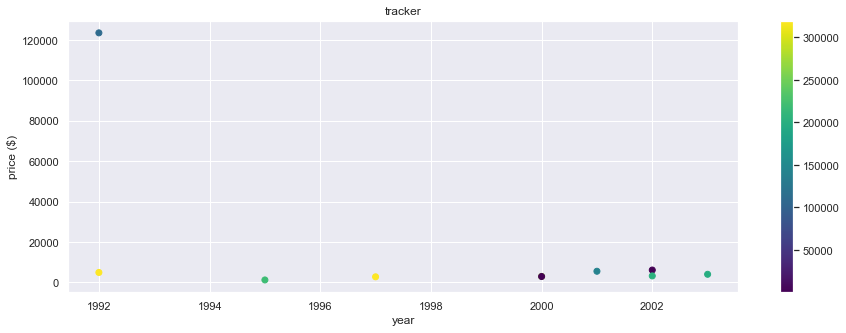

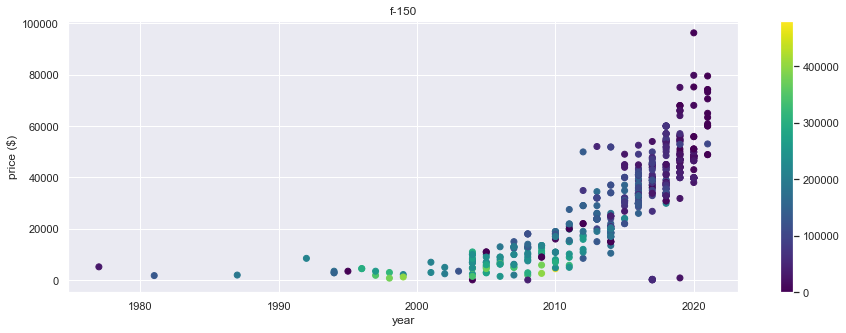

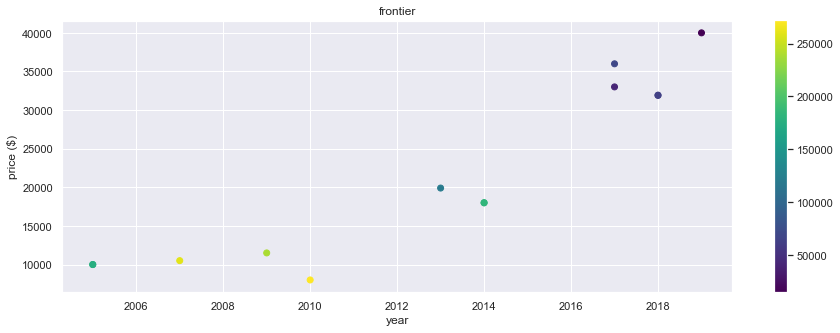

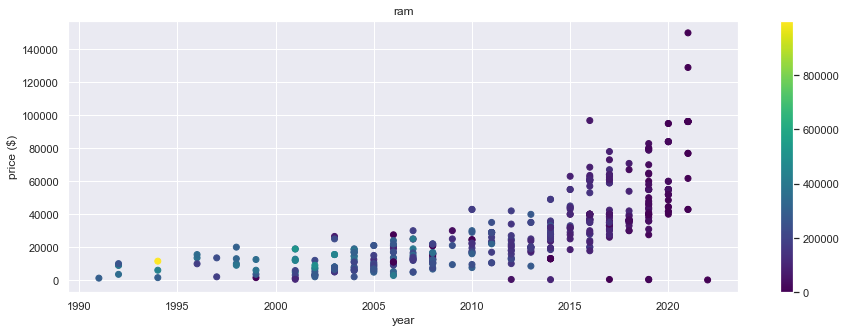

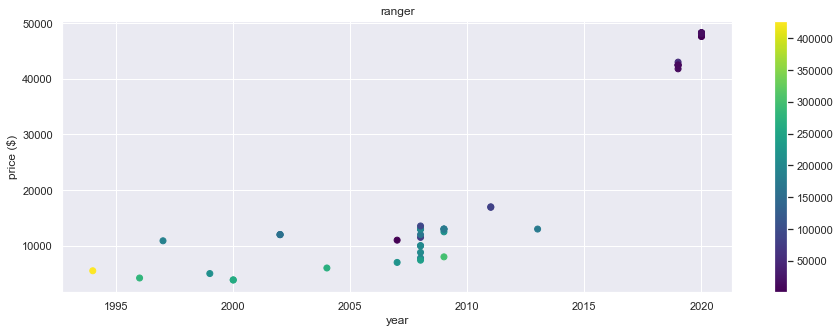

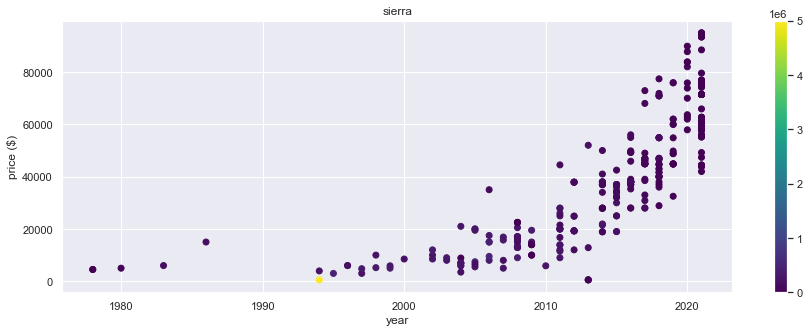

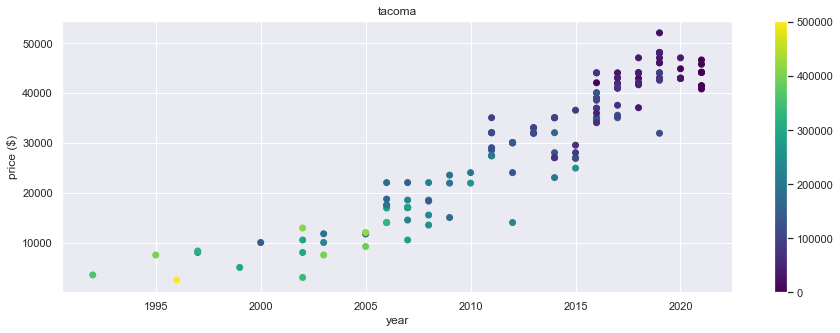

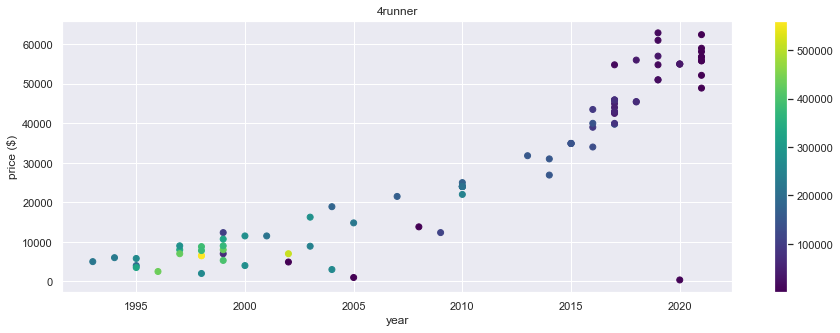

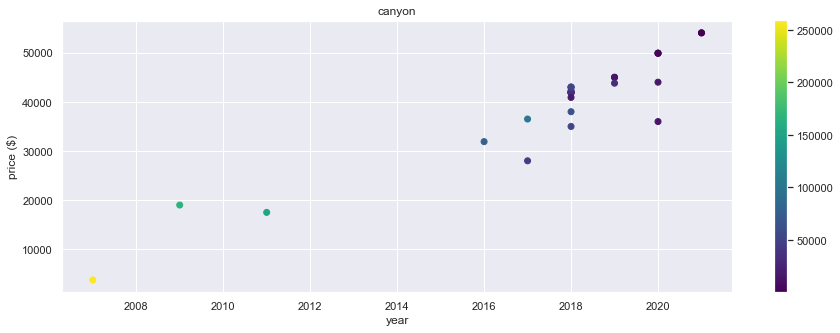

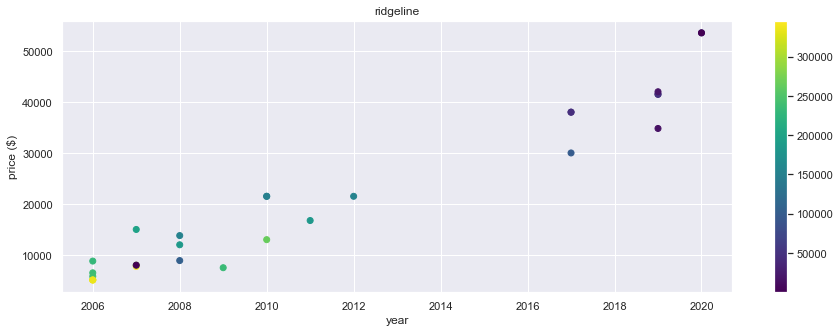

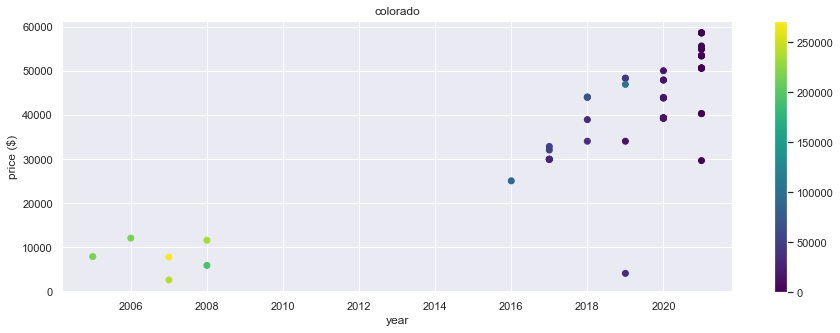

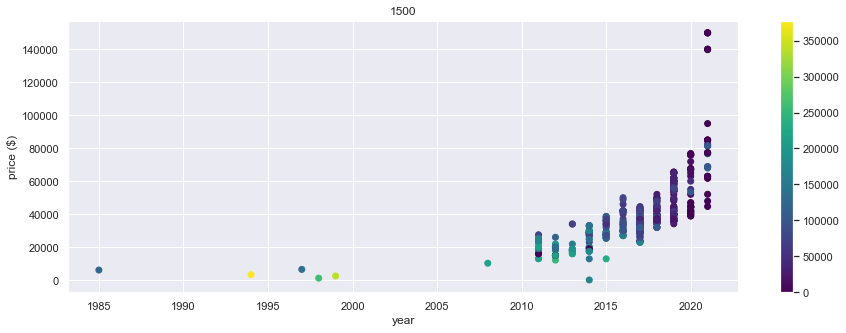

In [183]:
names = ['grand-vitara', 'tracker',  'f-150', 'frontier', 'ram', 'ranger', 'sierra', 'tacoma', '4runner', 'canyon', 'ridgeline', 'colorado', '1500']
for name in names:
    df = cars[(cars['model0']==name) & (cars['drive']==' 4wd')]
    trucks = plt.scatter(x = df['year'], y = df['price'], c=df['odometer'], cmap='viridis')
    plt.colorbar(trucks)
    plt.xlabel('year')
    plt.ylabel('price ($)')
    plt.title(name)
    plt.show()

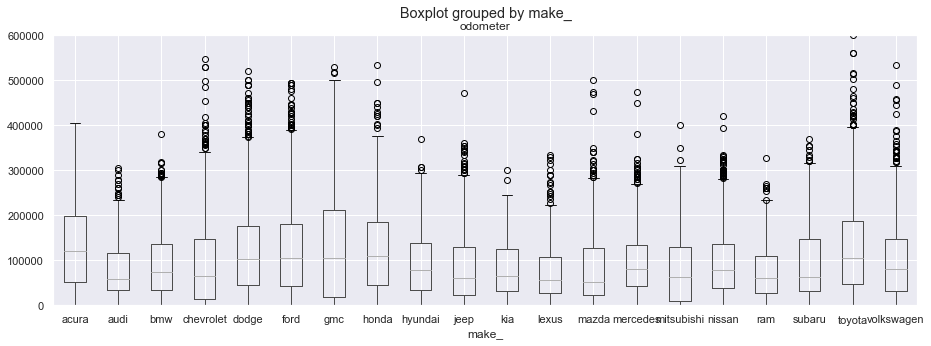

In [199]:
#boxplot odometer vs make
pop_makes = cars['make_'].value_counts()[:20].index.values
cars[cars['make_'].isin(pop_makes)].boxplot(column='odometer', by='make_')
plt.ylim(0, 600000)
plt.show()

In [203]:
def get_missing_info(df):
    num_entries = df.shape[0]*df.shape[1]
    null_entries = df.isnull().sum().sum()
    percent_empty = null_entries/num_entries*100
    num_missing = df.isna().sum()
    percent_missing = num_missing/len(df)*100
    col_modes = df.mode().loc[0]
    percent_mode = [df[x].isin([df[x].mode()[0]]).sum()/len(df)*100 for x in df]
    missing_value_df = pd.DataFrame({'num_missing': num_missing,
                                     'percent_missing': percent_missing, 
                                     'mode': col_modes,
                                     'percent_mode':percent_mode})
    print('total empty percent:', percent_empty, '%')
    print('columns that are more than 97% mode:', missing_value_df.loc[missing_value_df['percent_mode']>97].index.values)
    return(missing_value_df)
get_missing_info(cars)

total empty percent: 0.007004056172530504 %
columns that are more than 97% mode: []


,num_missing,percent_missing,mode,percent_mode
condition,0,0.000000,excellent,49.712113
drive,0,0.000000,4wd,45.041643
fuel,0,0.000000,gas,89.673549
location,0,0.000000,surrey,9.978308
odometer,0,0.000000,1,1.813021
paint color,0,0.000000,unknown,29.790311
price,0,0.000000,3500,0.779304
sale type,0,0.000000,dealer,70.855092
title status,0,0.000000,clean,94.694839
transmission,0,0.000000,automatic,89.724432


In [213]:
cars.columns

Index(['condition', 'drive', 'fuel', 'location', 'odometer', 'paint color',
       'price', 'sale type', 'title status', 'transmission', 'type',
       'cylinders', 'size', 'latitude', 'longitude', 'location_simple', 'year',
       'age', 'make_', 'model', 'pos_words', 'neg_words', 'low_text', 'model0',
       'model1', 'model2'],
      dtype='object')

In [ ]:
#pairplot
# train_dataset = X_train.copy()
# train_dataset.insert(0, "price", y_train)
# _ = sns.pairplot(train_dataset, kind='reg', diag_kind='kde')